# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [6]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Create a Pandas DataFrame with the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

In [62]:
# Split the dataset into training and testing sets

# Split the dataset into features (X) and target variable (y)
X = data.data
y = data.target

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [14]:
# Display first 5 rows
print(df.head())
# Print shape of dataframe subset where the target equals 1
print(df[df['target'] == 1].shape)
# Print shape of full dataframe
print(df.shape)
# Print sum of null values dataframe
print(df.isnull().sum())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

We note that there are 357 rows where the target = 1 and 212 where target = 0, so there is a bit of class imbalance but not to a problematic degree. We also note that there are no missing values in any of the columns so we need not worry about filling those in.


Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [19]:
# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=50)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Decision Tree Model Evaluation:
Accuracy: 0.9122807017543859

Confusion Matrix:
[[35  4]
 [ 6 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.95      0.92      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114



We see from the above results that the basic decision tree classifier we trained does reasonably well - about 91% accuracy and does slightly better at classifying instances in the positive class (this could in part be due to class imbalance).

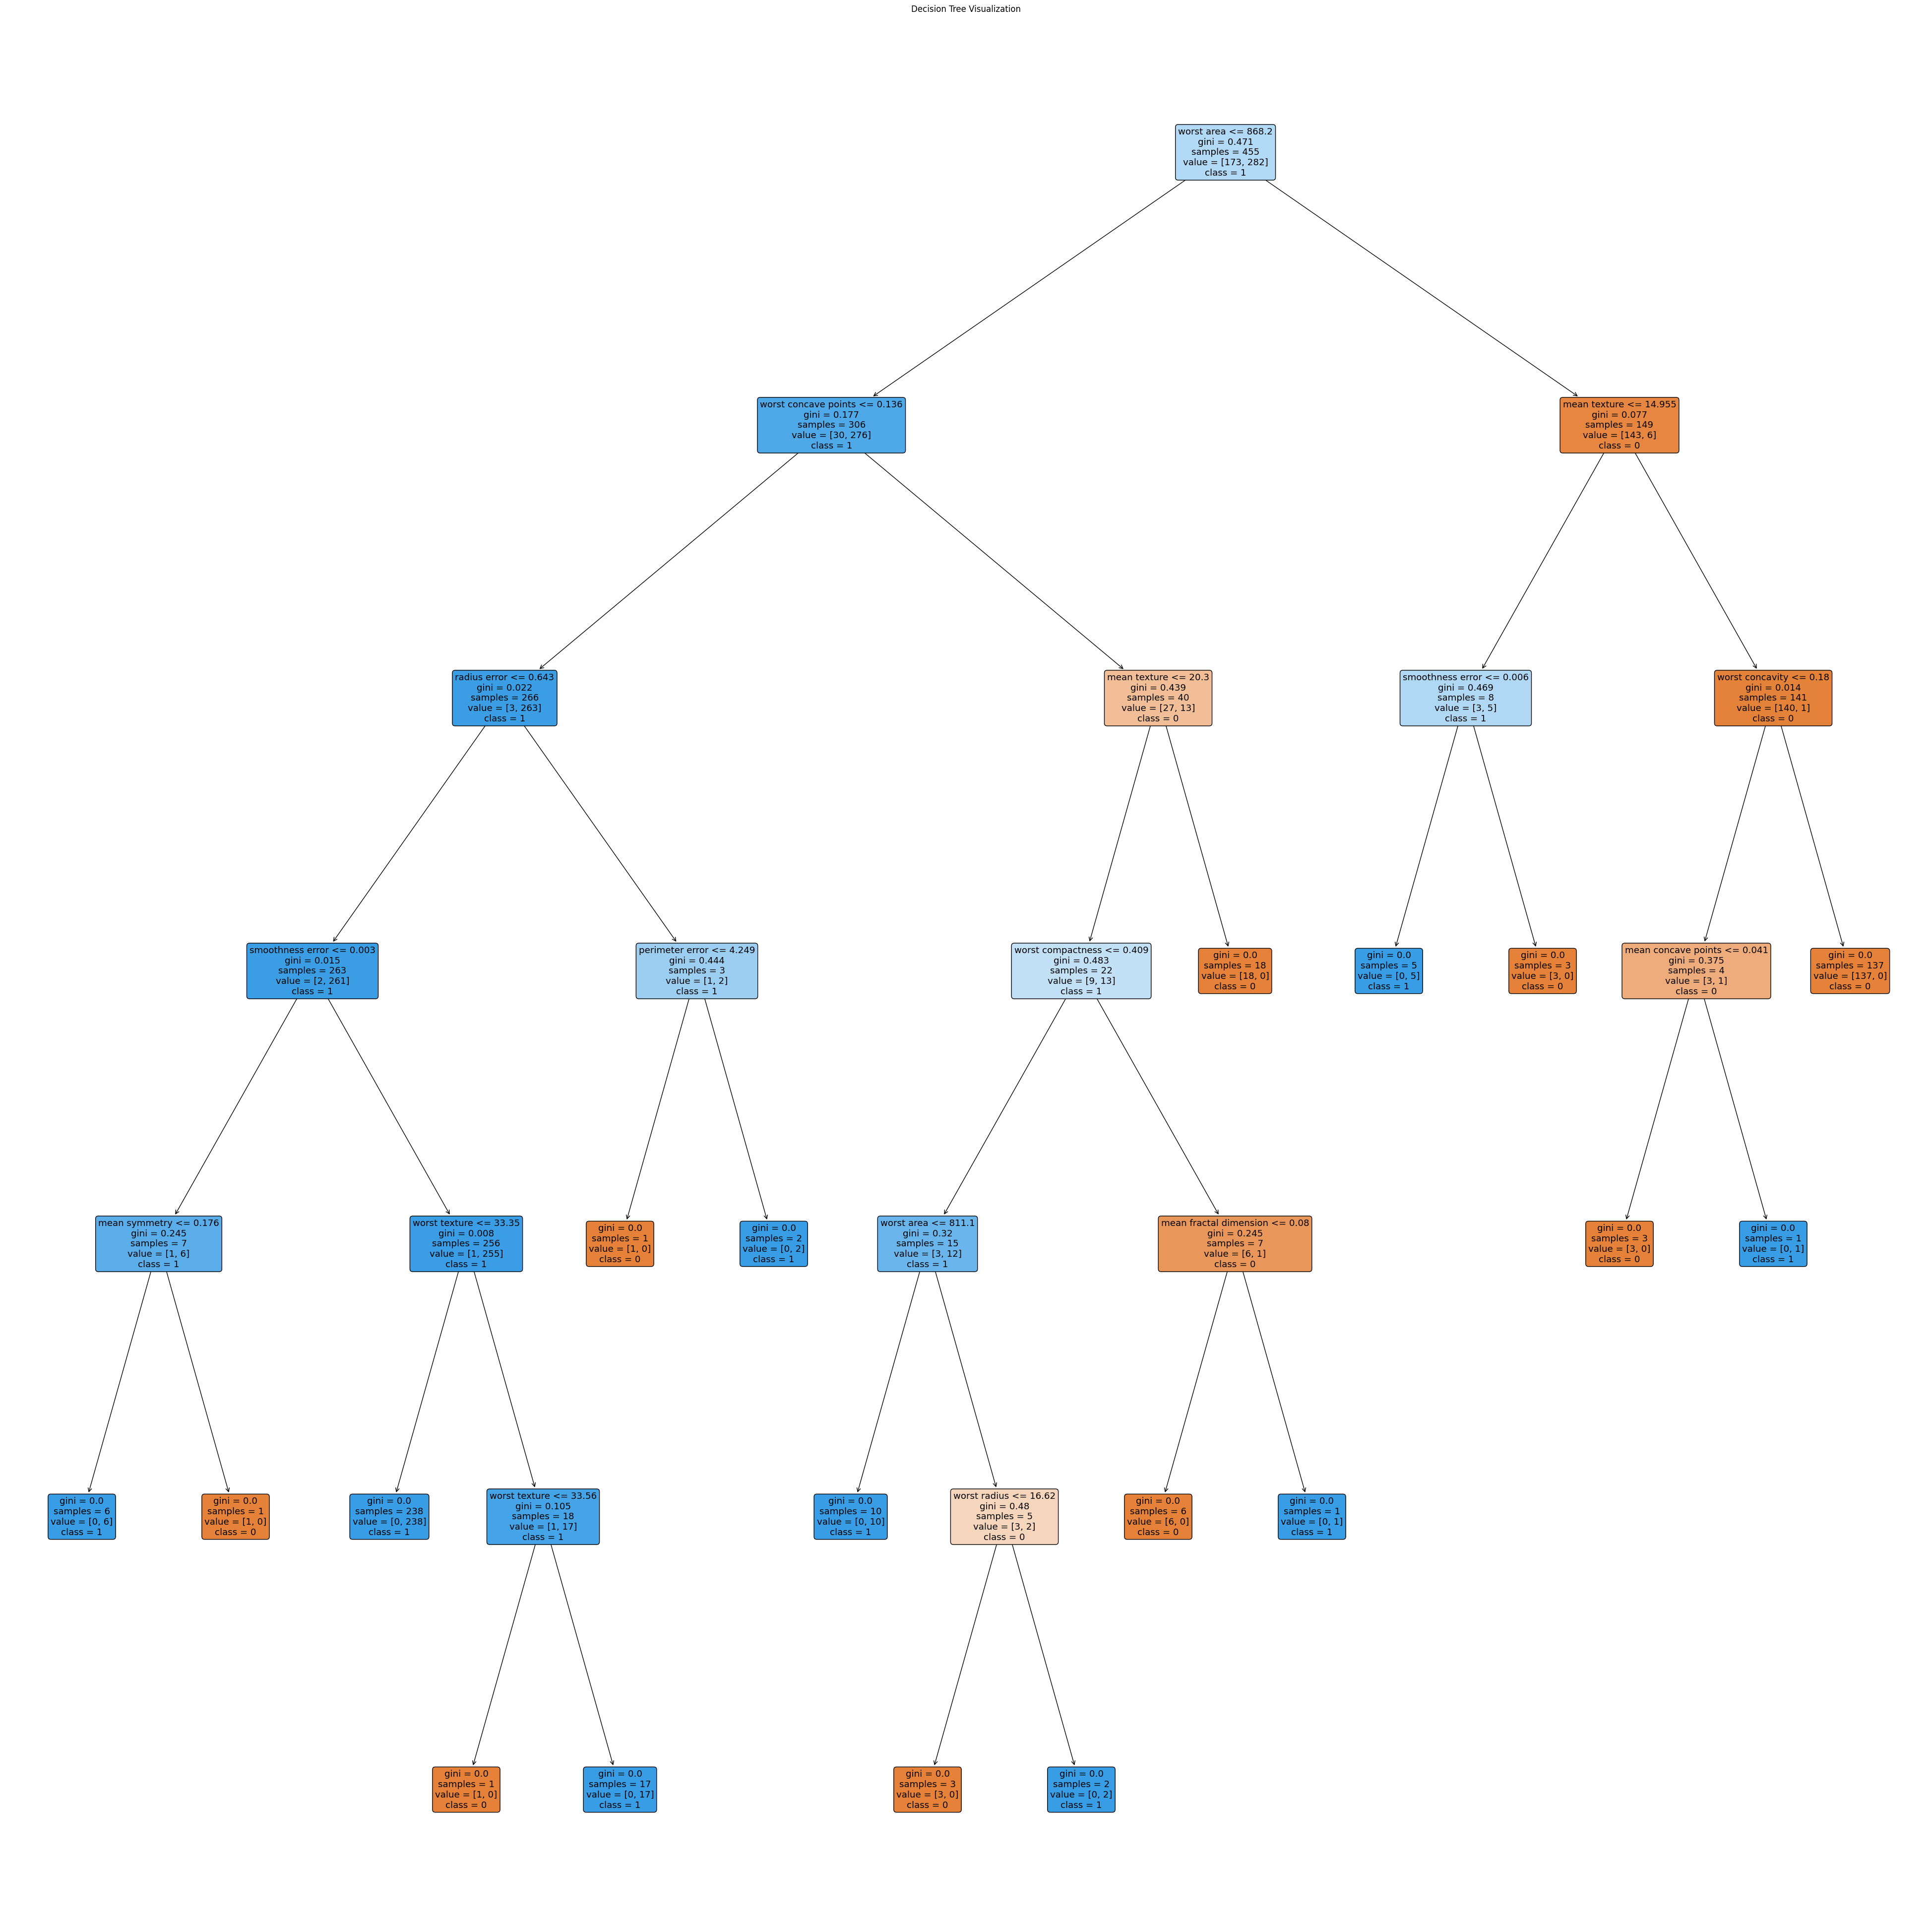

In [23]:
# Visualize the Decision Tree
plt.figure(figsize=(50, 50))
plot_tree(decision_tree_model, filled=True, feature_names=data.feature_names, class_names=["0", "1"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

We see that the resultant decision tree is rather complex with a fair number of splits. This kind of makes sense given the number of features in our data set and the variability of tumors.

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [27]:
# Train random forest model

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=50)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Random Forest Model Evaluation:
Accuracy: 0.956140350877193

Confusion Matrix:
[[37  2]
 [ 3 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.97      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



We see that the out of box random forest classifier method we use is notably better on the chosen training data subset than the basic decision tree classifier. The accuracy here is about 95-96%. Again we see that the classifier handles positive instances slightly better than negative instances.

In [28]:
# Extract feature importances
feature_importances = random_forest_model.feature_importances_

In [37]:
# Print feature importance

# Create a DataFrame to more clearly display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': feature_importances})

print(feature_importance_df)

                    Feature  Importance
0               mean radius    0.044812
1              mean texture    0.021166
2            mean perimeter    0.007308
3                 mean area    0.029048
4           mean smoothness    0.003413
5          mean compactness    0.009886
6            mean concavity    0.046599
7       mean concave points    0.131047
8             mean symmetry    0.003055
9    mean fractal dimension    0.005301
10             radius error    0.004937
11            texture error    0.003467
12          perimeter error    0.010056
13               area error    0.029539
14         smoothness error    0.003957
15        compactness error    0.004374
16          concavity error    0.003143
17     concave points error    0.003616
18           symmetry error    0.002236
19  fractal dimension error    0.004063
20             worst radius    0.137743
21            worst texture    0.020324
22          worst perimeter    0.113949
23               worst area    0.120331


AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [63]:
# Build and train an AdaBoostClassifier on your training data.

# Create a Decision Tree with max_depth=1 as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=50)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:
Accuracy: 0.9649122807017544

Confusion Matrix:
[[39  0]
 [ 4 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        39
           1       1.00      0.95      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



We see that even with max_depth of the decision tree estimators equal to 1, the accuracy of AdaBoost is improved from out-of-box random forest. Accuracy was around 97% for the chosen training test set. The precision on positive instances for this particular test set was excellent, and so was the recall for negative cases. I think this means there were no false positives.

In [64]:
# Evaluate models

''' so far using out-of-box implementations of the algorithms with only one train/test split, AdaBoost outperformed Random Forest which outperformed Decision Tree'''

# We first see what results we get using a different train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=50)

# train the model
decision_tree_model.fit(X_train, y_train)

# make predictions of test data
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Decision Tree Model Evaluation:
Accuracy: 0.9370629370629371

Confusion Matrix:
[[50  6]
 [ 3 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        56
           1       0.93      0.97      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



With the other chosen train/test split, the decision tree classifier had an accuracy of about 91%. For this data sampling, the accuracy is better, almost 94%. Let's compare to the others and then we will see if we can get better results by tweaking parameters.

In [55]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=100)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Random Forest Model Evaluation:
Accuracy: 0.958041958041958

Confusion Matrix:
[[52  4]
 [ 2 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        56
           1       0.96      0.98      0.97        87

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



For random forest, the accuracy with this other train/test split is almost the same, but still shows a bit of an improvement, like the Decision tree classifier. This is probably due to the nature of the train/test set split, making it easier for the models to generalize.

In [67]:
# Create a Decision Tree with max_depth=1 as the base estimator
estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:
Accuracy: 0.965034965034965

Confusion Matrix:
[[52  4]
 [ 1 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.96      0.99      0.97        87

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



The accuracy for AdaBoost on this other train/test split barely changes (this may indicate less variance in the model's predictions from choice of training/test set alone), and it still does a little better than the Random Forest Classifier making it out of the box a better method to use for making predictions on this dataset, as far as we've seen. But how can we improve the accuracy of this AdaBoost model on the chosen train/test/split?



In [68]:
# get some info about the default AdaBoost algorithm hyperparameter values
print(adaboost_model.__dict__)

{'estimator': DecisionTreeClassifier(max_depth=1), 'n_estimators': 50, 'estimator_params': (), 'base_estimator': 'deprecated', 'learning_rate': 1.0, 'random_state': 100, 'algorithm': 'SAMME.R', 'n_features_in_': 30, 'estimator_': DecisionTreeClassifier(max_depth=1), 'estimators_': [DecisionTreeClassifier(max_depth=1, random_state=186422792), DecisionTreeClassifier(max_depth=1, random_state=735107864), DecisionTreeClassifier(max_depth=1, random_state=1195587395), DecisionTreeClassifier(max_depth=1, random_state=1769725799), DecisionTreeClassifier(max_depth=1, random_state=1823289175), DecisionTreeClassifier(max_depth=1, random_state=113311823), DecisionTreeClassifier(max_depth=1, random_state=1480802224), DecisionTreeClassifier(max_depth=1, random_state=638252938), DecisionTreeClassifier(max_depth=1, random_state=20267358), DecisionTreeClassifier(max_depth=1, random_state=673068980), DecisionTreeClassifier(max_depth=1, random_state=522135394), DecisionTreeClassifier(max_depth=1, random_

In [69]:
# We will start by changing the max depth of the weak learners. We'll try n=2.

# Create a Decision Tree with max_depth=2 as the base estimator
estimator = DecisionTreeClassifier(max_depth=2)
adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:
Accuracy: 0.965034965034965

Confusion Matrix:
[[52  4]
 [ 1 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.96      0.99      0.97        87

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Note that changing max depth to 2 did nothing in this case.

In [70]:
# We'll try n=5 for max_depth

# Create a Decision Tree with max_depth=5 as the base estimator
estimator = DecisionTreeClassifier(max_depth=5)
adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:
Accuracy: 0.9790209790209791

Confusion Matrix:
[[53  3]
 [ 0 87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.97      1.00      0.98        87

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [71]:
# we see that the accuracy has signicant enough improvement from n = 2 to n = 5

# We'll try n=10 for curiosity's sake.

# Create a Decision Tree with max_depth=10 as the base estimator
estimator = DecisionTreeClassifier(max_depth=10)
adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth=1) Model Evaluation:
Accuracy: 0.9230769230769231

Confusion Matrix:
[[51  5]
 [ 6 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        56
           1       0.94      0.93      0.94        87

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [73]:
# we see that the accuracy went way down with n=10. Let's get figures for n=1 through 10.

for i in range(1, 11):
  # run same code with max_depth = i
  # Create a Decision Tree with max_depth=10 as the base estimator
  estimator = DecisionTreeClassifier(max_depth=i)
  adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100)

  # Train the AdaBoost model on the training data
  adaboost_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = adaboost_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  #conf_matrix = confusion_matrix(y_test, y_pred)
  #classification_rep = classification_report(y_test, y_pred)

  # Print the accuracy
  print(f"AdaBoostClassifier with Decision Tree (max_depth = {i}) Model Evaluation:")
  print("Accuracy:", accuracy)
  #print("\nConfusion Matrix:")
  #print(conf_matrix)
  #print("\nClassification Report:")
  #print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth = 1) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 2) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 3) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 4) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 5) Model Evaluation:
Accuracy: 0.9790209790209791
AdaBoostClassifier with Decision Tree (max_depth = 6) Model Evaluation:
Accuracy: 0.9230769230769231
AdaBoostClassifier with Decision Tree (max_depth = 7) Model Evaluation:
Accuracy: 0.9230769230769231
AdaBoostClassifier with Decision Tree (max_depth = 8) Model Evaluation:
Accuracy: 0.9230769230769231
AdaBoostClassifier with Decision Tree (max_depth = 9) Model Evaluation:
Accuracy: 0.9230769230769231
AdaBoostClassifier with Decision Tree (max_depth = 10) Model Evaluation:
Accuracy: 0.9230769230

We see that the classifier does indeed do best for max_depth of the estimator equal to 5. What if we change n_estimators? The default value is 50, let us try multiples of 8 and see where the results are best.

In [75]:
# back to the for loop

for i in range(1, 9):
  # let n = 8*i
  # Create a Decision Tree with n_estimators = n, and max_depth = 5
  estimator = DecisionTreeClassifier(max_depth=5)
  n = 8*i
  adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100, n_estimators=n)

  # Train the AdaBoost model on the training data
  adaboost_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = adaboost_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  #conf_matrix = confusion_matrix(y_test, y_pred)
  #classification_rep = classification_report(y_test, y_pred)

  # Print the accuracy
  print(f"AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = {n}) Model Evaluation:")
  print("Accuracy:", accuracy)
  #print("\nConfusion Matrix:")
  #print(conf_matrix)
  #print("\nClassification Report:")
  #print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 8) Model Evaluation:
Accuracy: 0.958041958041958
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 16) Model Evaluation:
Accuracy: 0.986013986013986
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 24) Model Evaluation:
Accuracy: 0.9790209790209791
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 32) Model Evaluation:
Accuracy: 0.9790209790209791
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 40) Model Evaluation:
Accuracy: 0.9790209790209791
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 48) Model Evaluation:
Accuracy: 0.9790209790209791
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 56) Model Evaluation:
Accuracy: 0.9790209790209791
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 64) Model Evaluation:
Accuracy: 0.9790209790209791


Interestingly, there is a point where using more trees worsens accuracy in this case, and that happens somewhere between 8 and 24 trees. Let's update the code above to see exactly where accuracy is highest, use that number of estimators with max_depth = 5, and see if we can change the learning rate to get the highest accuracy we can with AdaBoost. This combination of parameter values is likely unique to the train/test split so if we really wanted an optimized model we'd need to do cross-validation, but for now we look at just 1 train/test split.

In [76]:
# back to the for loop

for i in range(8, 24):
  # let n = i
  # Create a Decision Tree with n_estimators = n, and max_depth = 5
  estimator = DecisionTreeClassifier(max_depth=5)
  n = i
  adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100, n_estimators=n)

  # Train the AdaBoost model on the training data
  adaboost_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = adaboost_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  #conf_matrix = confusion_matrix(y_test, y_pred)
  #classification_rep = classification_report(y_test, y_pred)

  # Print the accuracy
  print(f"AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = {n}) Model Evaluation:")
  print("Accuracy:", accuracy)
  #print("\nConfusion Matrix:")
  #print(conf_matrix)
  #print("\nClassification Report:")
  #print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 8) Model Evaluation:
Accuracy: 0.958041958041958
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 9) Model Evaluation:
Accuracy: 0.958041958041958
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 10) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 11) Model Evaluation:
Accuracy: 0.972027972027972
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 12) Model Evaluation:
Accuracy: 0.986013986013986
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 13) Model Evaluation:
Accuracy: 0.972027972027972
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14) Model Evaluation:
Accuracy: 0.986013986013986
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 15) Model Evaluation:
Accuracy: 0.9790209790209791
AdaBoostClassifier with Decision Tree (max_depth 

In this case, the best choice of n_estimators would be 12, 14, or 16. So we will just take 14 as our magic number. The plan now will be to use the foor loop to look at accuracy with different learning rate values, n_estimators=14, and max_depth = 5. What's the best possible accuracy we can get on this train/test split?

In [78]:
# back to the for loop

for i in range(1, 11):
  # let the learning rate be lr
  # Create a Decision Tree with max_depth = 5
  estimator = DecisionTreeClassifier(max_depth=5)
  # increment learning rate in this for loop by .1
  lr = .1*i
  adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100, n_estimators=14, learning_rate=lr)

  # Train the AdaBoost model on the training data
  adaboost_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = adaboost_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  #conf_matrix = confusion_matrix(y_test, y_pred)
  #classification_rep = classification_report(y_test, y_pred)

  # Print the accuracy
  print(f"AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = {lr}) Model Evaluation:")
  print("Accuracy:", accuracy)
  #print("\nConfusion Matrix:")
  #print(conf_matrix)
  #print("\nClassification Report:")
  #print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 0.1) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 0.2) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 0.30000000000000004) Model Evaluation:
Accuracy: 0.951048951048951
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 0.4) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 0.5) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 0.6000000000000001) Model Evaluation:
Accuracy: 0.958041958041958
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 0.7000000000000001) Model Evaluation:

Evidently, a higher learning rate is desired. What about values greater than 1?

In [79]:
# back to the for loop

for i in range(1, 11):
  # let the learning rate be lr
  # Create a Decision Tree with max_depth = 5
  estimator = DecisionTreeClassifier(max_depth=5)
  # increment learning rate in this for loop by .1
  lr = i
  adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100, n_estimators=14, learning_rate=lr)

  # Train the AdaBoost model on the training data
  adaboost_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = adaboost_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  #conf_matrix = confusion_matrix(y_test, y_pred)
  #classification_rep = classification_report(y_test, y_pred)

  # Print the accuracy
  print(f"AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = {lr}) Model Evaluation:")
  print("Accuracy:", accuracy)
  #print("\nConfusion Matrix:")
  #print(conf_matrix)
  #print("\nClassification Report:")
  #print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1) Model Evaluation:
Accuracy: 0.986013986013986
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 2) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 3) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 4) Model Evaluation:
Accuracy: 0.958041958041958
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 5) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 6) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 7) Model Evaluation:
Accuracy: 0.9440559440559441
AdaBoostClassifier with Decis

What about between 1 and 2?

In [80]:
# back to the for loop

for i in range(1, 11):
  # let the learning rate be lr
  # Create a Decision Tree with max_depth = 5
  estimator = DecisionTreeClassifier(max_depth=5)
  # increment learning rate in this for loop by .1
  lr = 1 + .1*i
  adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=100, n_estimators=14, learning_rate=lr)

  # Train the AdaBoost model on the training data
  adaboost_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = adaboost_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  #conf_matrix = confusion_matrix(y_test, y_pred)
  #classification_rep = classification_report(y_test, y_pred)

  # Print the accuracy
  print(f"AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = {lr}) Model Evaluation:")
  print("Accuracy:", accuracy)
  #print("\nConfusion Matrix:")
  #print(conf_matrix)
  #print("\nClassification Report:")
  #print(classification_rep)

AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1.1) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1.2) Model Evaluation:
Accuracy: 0.972027972027972
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1.3) Model Evaluation:
Accuracy: 0.972027972027972
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1.4) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1.5) Model Evaluation:
Accuracy: 0.958041958041958
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1.6) Model Evaluation:
Accuracy: 0.965034965034965
AdaBoostClassifier with Decision Tree (max_depth = 5, n_estimators = 14, learning rate = 1.7000000000000002) Model Evaluation:
Accuracy: 0.958041958041958
AdaBo

We could increase the granularity here, but it is probably safe to take the optimal learning rate as lr = 1. So we were able to find a sweet spot for the particular train/test split of n_estimators = 14, max_depth = 5, and learning_rate = 1.